In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing linear regression
from sklearn.linear_model import LinearRegression
#importing metrics to measure test scores
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#Import dataset
data = pd.read_csv("/content/IceCreamData.csv")

In [ ]:
#Looking at the dataset
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
#Describing the data
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
#info for Dtype and entry counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


The aim of this project is to Predict the daily revenue generated (in USD) based on the temperature (°C) outside using Simple Linear Regression.

From info(), I can infer that there are a total of 500 values in both Columns and that both columns are numerical values.

In [ ]:
#Checking dataset for missing values
data.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

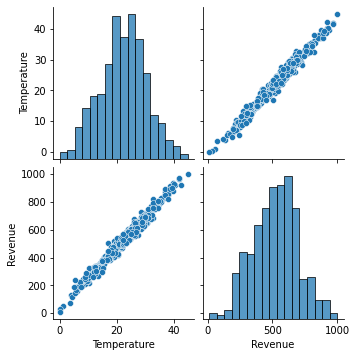

In [ ]:
#Visualising the values
sns.pairplot(data)

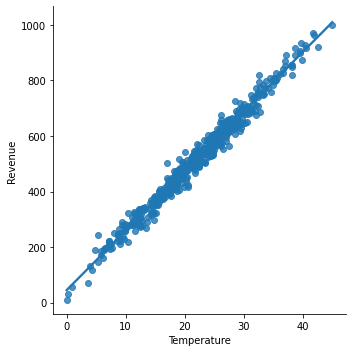

In [ ]:
#Specifying  X and Y linear plot
sns.lmplot(x = 'Temperature', y = 'Revenue', data=data)
X = data[['Temperature']]
y = data[['Revenue']]

Since the aim of this project is to predict revnue against temperature change, Revenue is the target feature while temperature is the independent feature.

In [ ]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [ ]:
#Using Linear Regression for model
lr = LinearRegression(fit_intercept = True)
lr.fit(X, y)
#Printing coefficient to estimate relationship between a predictor variable and the response
print('LinearRegression Coefficient :', lr.coef_)
#Printing intercept to estimate the value of a dependent variable based on the values of the independent variables
print('LinearRegression Intercept :', lr.intercept_)

LinearRegression Coefficient : [[21.44362551]]
LinearRegression Intercept : [44.83126709]


In [ ]:
y_pred = lr.predict(X)
y_pred

array([[ 571.63433656],
       [ 602.47684744],
       [ 640.76149723],
       [ 486.46991917],
       [ 291.50796255],
       [ 352.60119987],
       [ 338.77576542],
       [ 706.02368886],
       [  65.77890131],
       [ 723.93940567],
       [ 290.4734307 ],
       [ 123.41506912],
       [ 448.22497676],
       [ 336.99013414],
       [ 892.7102682 ],
       [ 441.17682074],
       [ 600.97973907],
       [ 956.51301868],
       [ 679.33700727],
       [ 511.78654093],
       [ 590.73957652],
       [ 371.08679604],
       [ 529.87140313],
       [ 393.47718592],
       [ 556.94202982],
       [ 451.79483048],
       [ 380.66984249],
       [ 670.66443508],
       [ 452.78789915],
       [ 797.93464202],
       [ 563.42256107],
       [ 371.44320411],
       [ 233.34116699],
       [ 435.81777674],
       [ 808.8445915 ],
       [ 839.47932995],
       [ 522.69281883],
       [ 420.46084135],
       [ 725.40732948],
       [ 410.43945545],
       [ 538.10946636],
       [ 232.582

In [ ]:
len(y_pred)

500

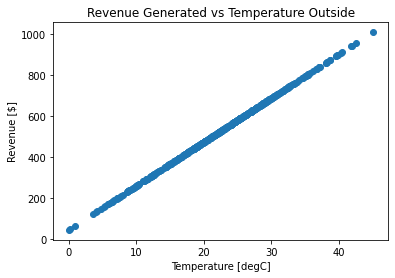

In [ ]:
#Visualizing the result
plt.scatter(X, y_pred)
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [$]')
plt.title('Revenue Generated vs Temperature Outside')
plt.show()

The Graph above shows that revenue generated is directly proportional to the temperature, when temperature increases, revenue is also increased.

In [ ]:
#Train test split model for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Temperature']], data[['Revenue']], test_size=0.2, random_state=42)

In [ ]:
#printing MSE, MAE and R2 Score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R-squared: ", r2)

Mean Squared Error:  646.9503783651506
Mean Absolute Error:  19.085715031573127
R-squared:  0.9773482908856934


The evaluations are meant to differentiate the performance of this linear regression. 

The high R2 values(97.73%) implies that there is a slight difference between predicted and actual values. 